# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [320]:
# imports
from __future__ import print_function
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')

In [321]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_TOKEN")

## Load Data

In [322]:
# Read the census data into a Pandas DataFrame
file_path = Path("../Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data = sfo_data.reset_index(inplace=False)
sfo_data

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [323]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_data_mean = sfo_data['housing_units'].groupby(sfo_data['year']).mean()

sfo_data_mean



year
2010    372560.0
2011    374507.0
2012    376454.0
2013    378401.0
2014    380348.0
2015    382295.0
2016    384242.0
Name: housing_units, dtype: float64

In [324]:
# Save the dataframe as a csv file
sfo_data_mean.to_csv("sfo_mean.csv")

<AxesSubplot:title={'center':'SF Housing Units 2010-2016'}, xlabel='year'>

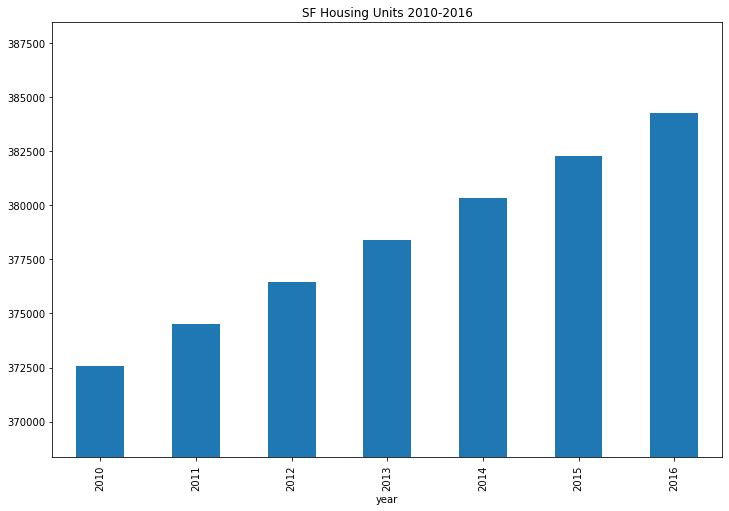

In [325]:
# Use the Pandas plot function to plot the average housing units per year.
min = sfo_data.min()['housing_units']
max = sfo_data.max()['housing_units']
#min 
#max
sfo_std = sfo_data_mean.std()
sfo_std

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
sfo_data_mean.plot.bar(ylim=(min-sfo_std, max + sfo_std), title= "SF Housing Units 2010-2016", figsize = (12,8))

In [326]:
sfo_data

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [327]:
# Calculate the average sale price per square foot and average gross rent
average_sale_price = sfo_data['sale_price_sqr_foot'].groupby(sfo_data['year']).mean()

average_sale_price

year
2010    369.344353
2011    341.903429
2012    399.389968
2013    483.600304
2014    556.277273
2015    632.540352
2016    697.643709
Name: sale_price_sqr_foot, dtype: float64

In [328]:
#average gross rent
average_gross_rent = sfo_data['gross_rent'].groupby(sfo_data['year']).mean()
#average_gross_rent

<AxesSubplot:title={'center':'Average Gross Rent'}, xlabel='year'>

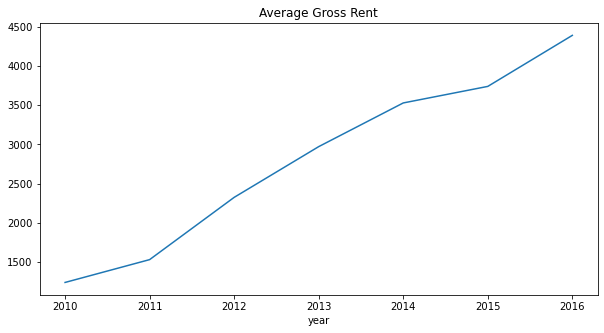

In [329]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent
# Line chart for average montly rent
average_gross_rent.plot.line(title="Average Gross Rent", figsize=(10,5))

#average_sale_price.plot.line(title="Average Sales Price Sq Ft, San Francisco", figsize=(10,5)) #I coded this in the same cell so that I could overlay avg sales price chart on the avg gross rent chart


<AxesSubplot:title={'center':'Average Sales Price Sq Ft, San Francisco'}, xlabel='year'>

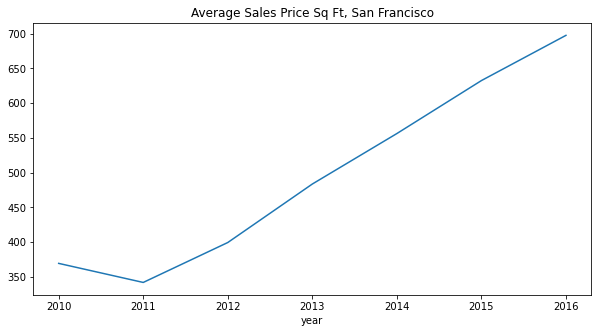

In [330]:
# Line chart for average sale price per square foot
average_sale_price.plot.line(title="Average Sales Price Sq Ft, San Francisco", figsize=(10,5)) #I still wanted to see how the chart changes if I print it by itself. 


- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [331]:
# Group by year and neighborhood and then create a new dataframe of the mean values

new_sfo_data = sfo_data.groupby(["year", "neighborhood"]).mean()

new_avg_price_df = pd.DataFrame(new_sfo_data)

#new_sfo_data = new_sfo_data.reset_index()

#new_sfo_data
new_avg_price_df


sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945       372560.0      1239.0
     Anza Vista                       267.932583       372560.0      1239.0
     Bayview                          170.098665       372560.0      1239.0
     Buena Vista Park                 347.394919       372560.0      1239.0
     Central Richmond                 319.027623       372560.0      1239.0
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771       384242.0      4390.0
     Twin Peaks                       970.085470       384242.0      4390.0
     Van Ness/ Civic Center           552.602567       384242.0      4390.0
     Visitacion Valley                328.319007       384242.0      4390.0
     Westwood Park                    631.195426       384242.0      4390.0

[397 rows x 3 columns]

In [332]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
new_sfo_data['sale_price_sqr_foot'].hvplot(
    xlabel='year',
    ylabel='average sale per square foot',
    label=' ',
    groupby='neighborhood',
    height=300,
    width=600,
)



BokehModel(combine_events=True, render_bundle={'docs_json': {'9b94e7b8-3055-454a-a1c6-72d4524c9e89': {'defs': …

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [333]:
# Use hvplot to create an interactive line chart of the average monthly rent.
new_sfo_data['gross_rent'].hvplot(
    xlabel='year',
    ylabel='gross rent',
    label=' ',
    groupby='neighborhood',
    height=300,
    width=600,
)



BokehModel(combine_events=True, render_bundle={'docs_json': {'b990b6a2-4ac5-45d7-a3b8-500ca54515ea': {'defs': …

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [334]:
# Getting the data from the top 10 expensive neighborhoods to own
top_ten_most_expensive = sfo_data.groupby('neighborhood').mean().sort_values(ascending=False, by= 'sale_price_sqr_foot').head(10).drop('year', axis=1)

top_ten_most_expensive_df = pd.DataFrame(top_ten_most_expensive)

top_ten_most_expensive_df = top_ten_most_expensive_df.reset_index()

top_ten_most_expensive_df 

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [335]:
# Plotting the data from the top 10 expensive neighborhoods
top_ten_most_expensive_df.hvplot.bar(
    x= "neighborhood",
    y= "sale_price_sqr_foot",
    title= "10 Most Expensive Neighborhoods in San Francisco, CA",
    height=260,
    rot= 45
)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [336]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
new_sfo_data.head(10)

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945       372560.0      1239.0
     Anza Vista                 267.932583       372560.0      1239.0
     Bayview                    170.098665       372560.0      1239.0
     Buena Vista Park           347.394919       372560.0      1239.0
     Central Richmond           319.027623       372560.0      1239.0
     Central Sunset             418.172493       372560.0      1239.0
     Corona Heights             369.359338       372560.0      1239.0
     Cow Hollow                 569.379968       372560.0      1239.0
     Croker Amazon              165.645730       372560.0      1239.0
     Diamond Heights            456.930822       372560.0      1239.0

In [337]:
# Plotting the data from the top 10 expensive neighborhoods
#new_sfo_data.hvplot.bar("year", ["sale_price_sqr_foot", "gross_rent"], groupby= "neighborhood", height= 450, width= 2000)  #this is the bar chart but I prefer line chart for this one
new_sfo_data.hvplot.line("year", ["sale_price_sqr_foot", "gross_rent"], groupby= "neighborhood")

BokehModel(combine_events=True, render_bundle={'docs_json': {'63646bf6-fa64-4149-a15f-21c0957fc106': {'defs': …

:DynamicMap   [neighborhood]
   :NdOverlay   [Variable]
      :Curve   [year]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [338]:
# Load neighborhoods coordinates data

file_path_2 = Path("../Data/neighborhoods_coordinates.csv")
location_data = pd.read_csv(file_path_2)
location_data


,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050
...,...,...,...
68,West Portal,37.740260,-122.463880
69,Western Addition,37.792980,-122.435790
70,Westwood Highlands,37.734700,-122.456854
71,Westwood Park,37.734150,-122.457000


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [339]:
# Calculate the mean values for each neighborhood
mean_values_each_neighborhood = sfo_data.groupby(['neighborhood']).mean()

mean_values_each_neighborhood = mean_values_each_neighborhood.reset_index() 
mean_values_each_neighborhood

,neighborhood,year,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,2013.000000,366.020712,378401.00,2817.285714
1,Anza Vista,2013.333333,373.382198,379050.00,3031.833333
2,Bayview,2012.000000,204.588623,376454.00,2318.400000
3,Bayview Heights,2015.000000,590.792839,382295.00,3739.000000
4,Bernal Heights,2013.500000,576.746488,379374.50,3080.333333
...,...,...,...,...,...
68,West Portal,2012.250000,498.488485,376940.75,2515.500000
69,Western Addition,2012.500000,307.562201,377427.50,2555.166667
70,Westwood Highlands,2012.000000,533.703935,376454.00,2250.500000
71,Westwood Park,2015.000000,687.087575,382295.00,3959.000000


In [340]:
# Join the average values with the neighborhood locations
combined_locations_means = pd.concat([location_data, mean_values_each_neighborhood], axis="columns")

#combined_locations_means

combined_locations_means = combined_locations_means.iloc[:, 1:]  #this is to get rid of the first column "Neighborhoods"

#combined_locations_means = combined_locations_means.dropna()

combined_locations_means


,Lat,Lon,neighborhood,year,sale_price_sqr_foot,housing_units,gross_rent
0,37.791012,-122.402100,Alamo Square,2013.000000,366.020712,378401.00,2817.285714
1,37.779598,-122.443451,Anza Vista,2013.333333,373.382198,379050.00,3031.833333
2,37.734670,-122.401060,Bayview,2012.000000,204.588623,376454.00,2318.400000
3,37.728740,-122.410980,Bayview Heights,2015.000000,590.792839,382295.00,3739.000000
4,37.728630,-122.443050,Bernal Heights,2013.500000,576.746488,379374.50,3080.333333
...,...,...,...,...,...,...,...
68,37.740260,-122.463880,West Portal,2012.250000,498.488485,376940.75,2515.500000
69,37.792980,-122.435790,Western Addition,2012.500000,307.562201,377427.50,2555.166667
70,37.734700,-122.456854,Westwood Highlands,2012.000000,533.703935,376454.00,2250.500000
71,37.734150,-122.457000,Westwood Park,2015.000000,687.087575,382295.00,3959.000000


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [341]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    combined_locations_means,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    zoom=20
)

map_plot.show()




- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [342]:
new_sfo_data

sfo_data

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


In [343]:
top_ten_most_expensive_df 

new_avg_price_df = new_avg_price_df.reset_index()

new_avg_price_df


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560.0,1239.0
1,2010,Anza Vista,267.932583,372560.0,1239.0
2,2010,Bayview,170.098665,372560.0,1239.0
3,2010,Buena Vista Park,347.394919,372560.0,1239.0
4,2010,Central Richmond,319.027623,372560.0,1239.0
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242.0,4390.0
393,2016,Twin Peaks,970.085470,384242.0,4390.0
394,2016,Van Ness/ Civic Center,552.602567,384242.0,4390.0
395,2016,Visitacion Valley,328.319007,384242.0,4390.0


In [344]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = new_avg_price_df[new_avg_price_df["neighborhood"].isin(top_ten_most_expensive_df["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560.0,1239.0
31,2010,Miraloma Park,680.608729,372560.0,1239.0
41,2010,Pacific Heights,496.516014,372560.0,1239.0
46,2010,Potrero Hill,491.450004,372560.0,1239.0
47,2010,Presidio Heights,549.417931,372560.0,1239.0


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [345]:
# Parallel Categories Plot
px.parallel_categories(
    top_ten_most_expensive_df,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    title="Parallel Categories of Most Expensive Neighborhoods in San Francisco"
    )

In [346]:
# Parallel Coordinates Plot
px.parallel_coordinates(
    top_ten_most_expensive_df,
    color="sale_price_sqr_foot",
    title="Parallel Coordinatess of Most Expensive Neighborhoods in San Francisco"

)

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [347]:
df_expensive_neighborhoods_per_year


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560.0,1239.0
31,2010,Miraloma Park,680.608729,372560.0,1239.0
41,2010,Pacific Heights,496.516014,372560.0,1239.0
46,2010,Potrero Hill,491.450004,372560.0,1239.0
47,2010,Presidio Heights,549.417931,372560.0,1239.0
49,2010,South Beach,1037.099789,372560.0,1239.0
52,2010,Telegraph Hill,524.793509,372560.0,1239.0
54,2010,Union Square District,569.193448,372560.0,1239.0
67,2011,Cow Hollow,390.595653,374507.0,1530.0
89,2011,Miraloma Park,414.676065,374507.0,1530.0


In [348]:
# Sunburst Plot
px.sunburst(
    df_expensive_neighborhoods_per_year,
    path = ["year","neighborhood"],
    values = "sale_price_sqr_foot",
    color="gross_rent", 
    hover_data=["gross_rent"],
    color_continuous_scale="blues",
    height = 700,
  
)